In [22]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from imutils.paths import list_images

image = cv2.imread("HTS/a01-053x.png")
# plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


# Grayscale & Binary Threshold
First the image is converted to grayscale and then the image is converted either to black or white depending on a threshold. 

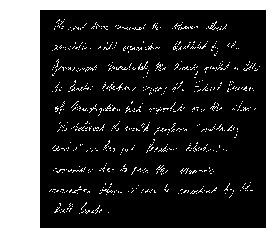

In [23]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Dilation
Perform dilation in order to increase the white region in the image with a kernel (11,500).

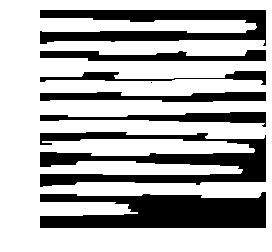

In [24]:
kernel = np.ones((11,500), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.imshow(cv2.cvtColor(dilation,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Find the contours
Find the curve joining all the points along the boundary having the same color or intensity.

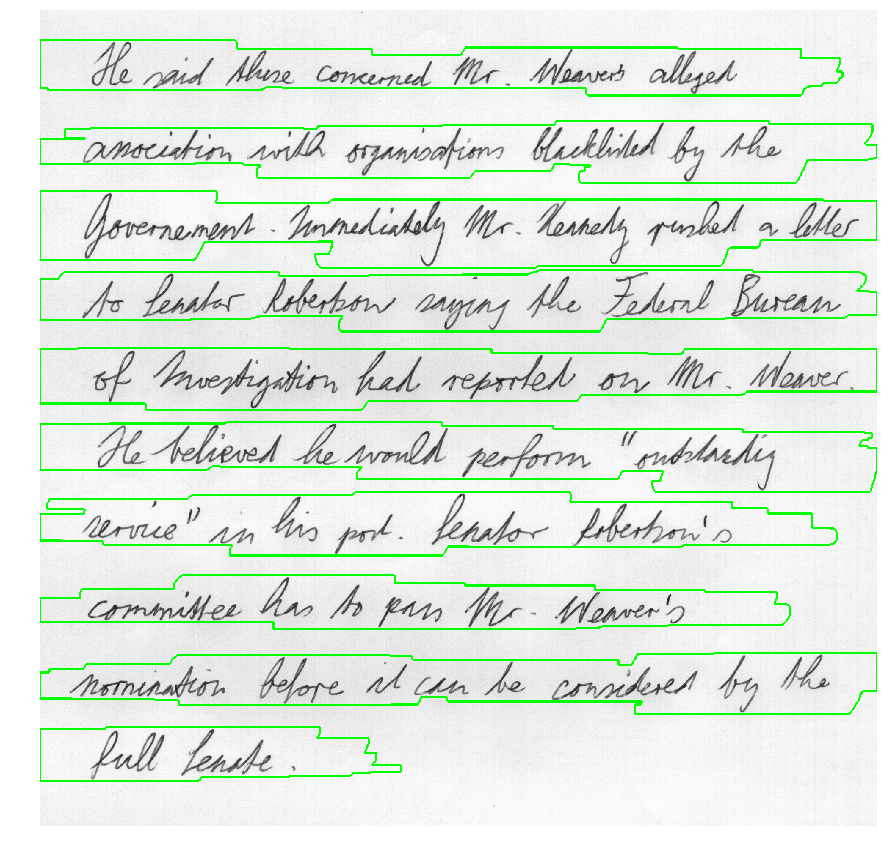

In [25]:
contours,_ = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_cont = image.copy()
cv2.drawContours(image_cont,contours,-1,(0,255,0),3)
plt.figure(figsize = (15,15))
plt.imshow(cv2.cvtColor(image_cont,cv2.COLOR_BGR2RGB),aspect='auto')
plt.axis('off')
plt.show()


# Find Bounding Boxes

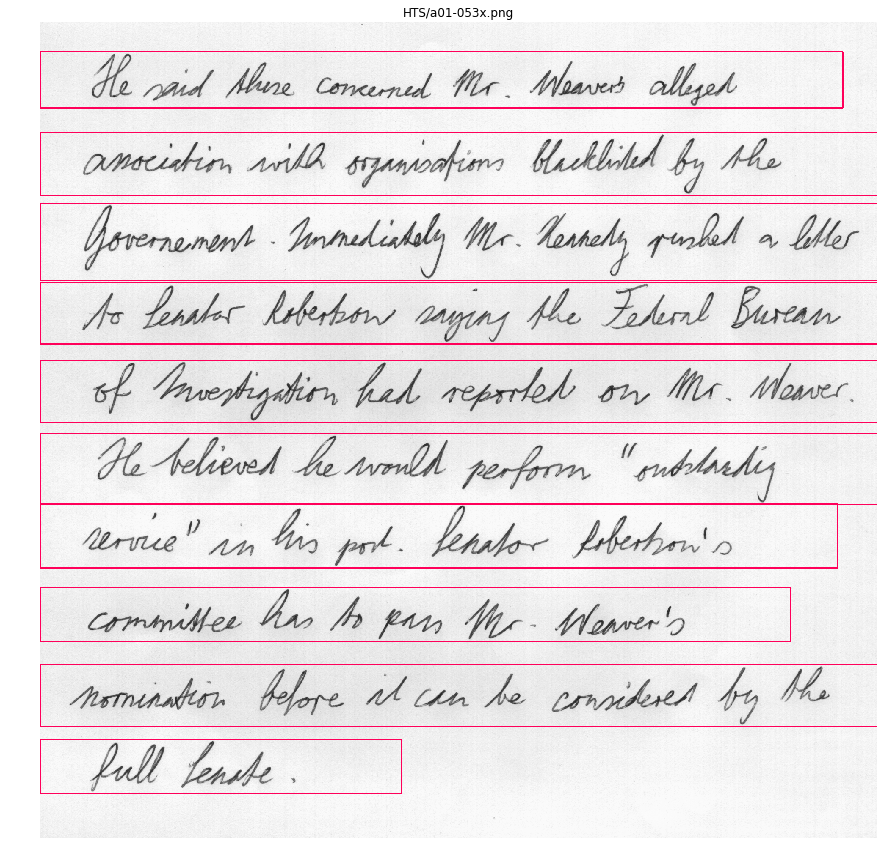

In [27]:
sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
plt.figure(figsize = (15,15))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),aspect='auto')
plt.axis('off')
plt.title('HTS/a01-053x.png')
plt.show()

# Putting everything in a function

In [28]:
def findLines(imagePath):
    img = cv2.imread(imagePath)
    
    #grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #binary
    _,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    
    #dilation
    kernel = np.ones((11,500), np.uint8)
    dilation = cv2.dilate(thresh, kernel, iterations=1)

    #find contours
    contours,_ = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_cont = img.copy()
    cv2.drawContours(image_cont,contours,-1,(0,255,0),3)
    # cv2.imwrite(imagePath.replace('HTS\\','contours/'), cv2.resize(image_cont, (0,0), fx=0.4, fy=0.4) )
    # plt.figure(figsize = (10,10))
    # plt.imshow(cv2.cvtColor(image_cont,cv2.COLOR_BGR2RGB),aspect='auto')
    # plt.axis('off')
    # plt.show()
    sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    
    # cv2.imwrite(imagePath.replace('HTS\\','lines/'), img)
    plt.figure(figsize = (15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),aspect='auto')
    plt.axis('off')
    plt.title(imagePath)
    plt.show()

# Show the rest images results

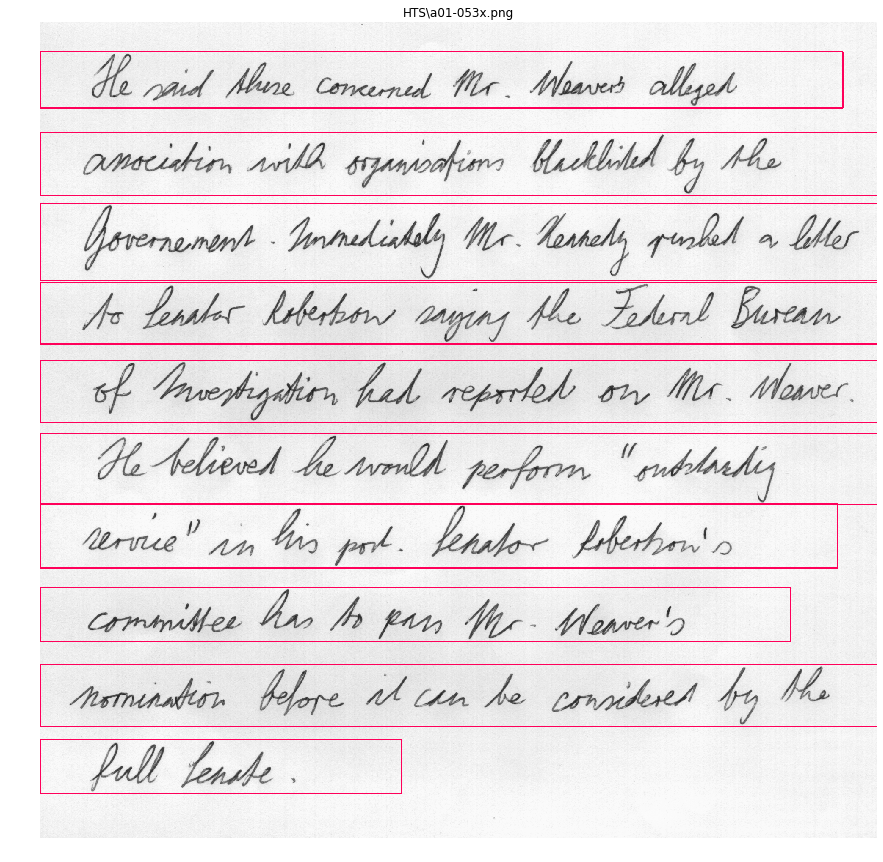

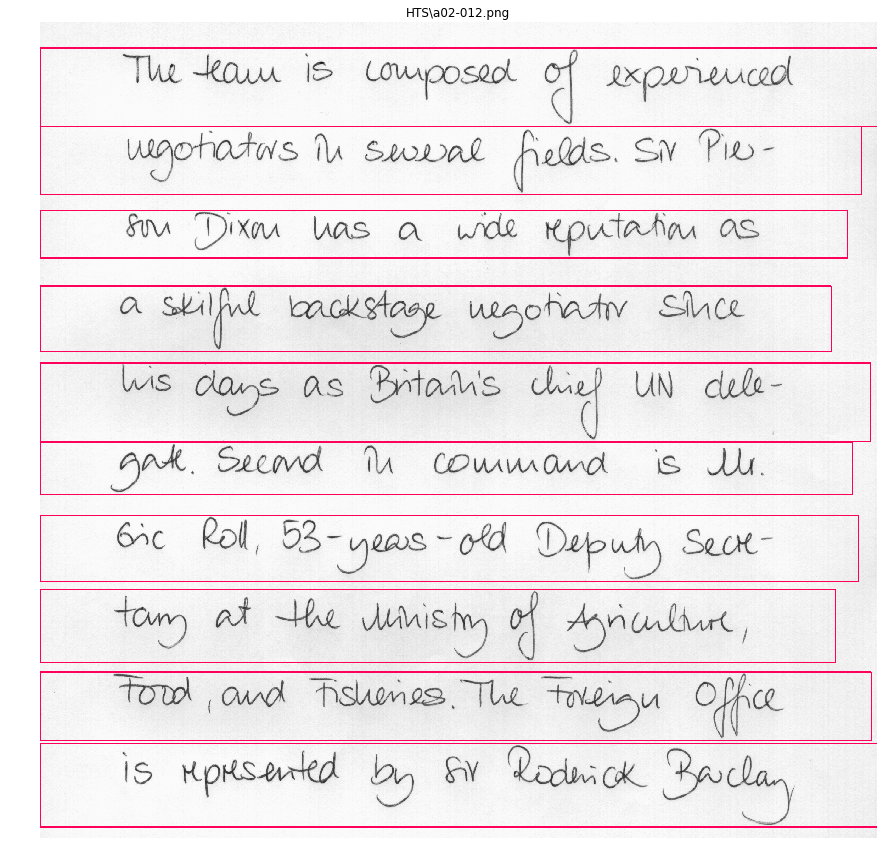

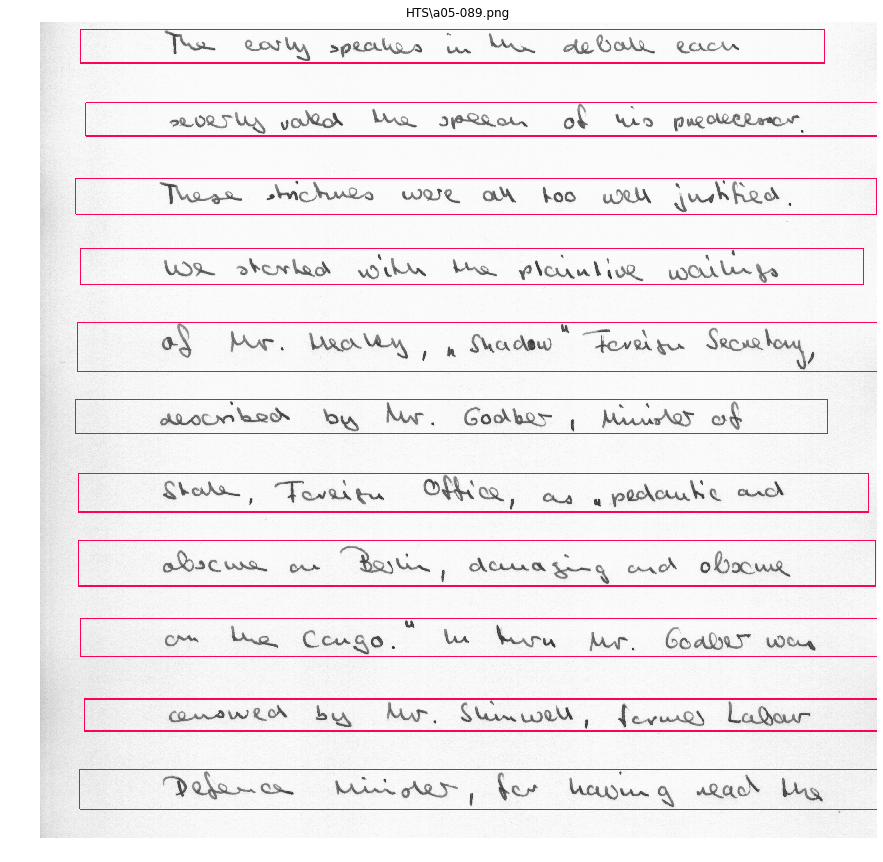

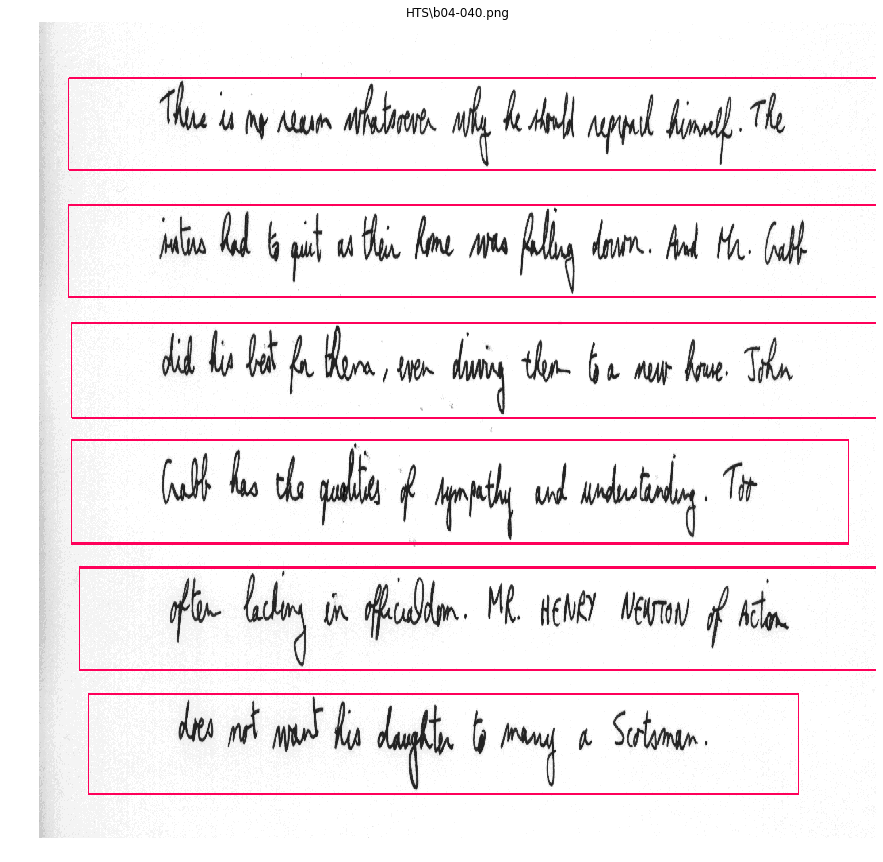

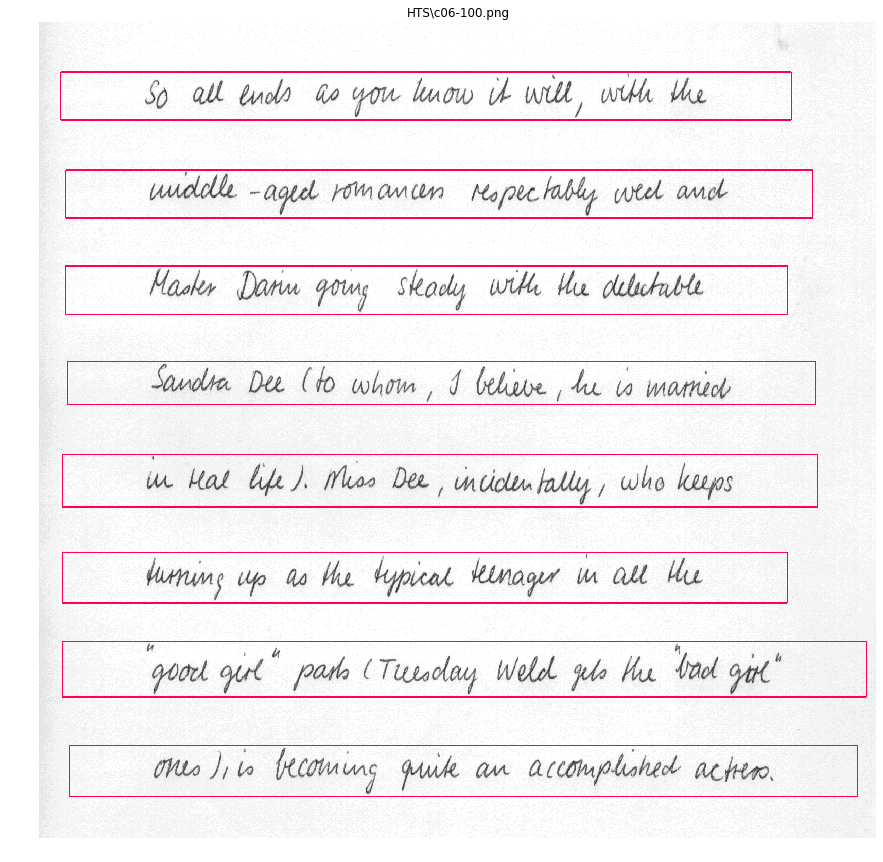

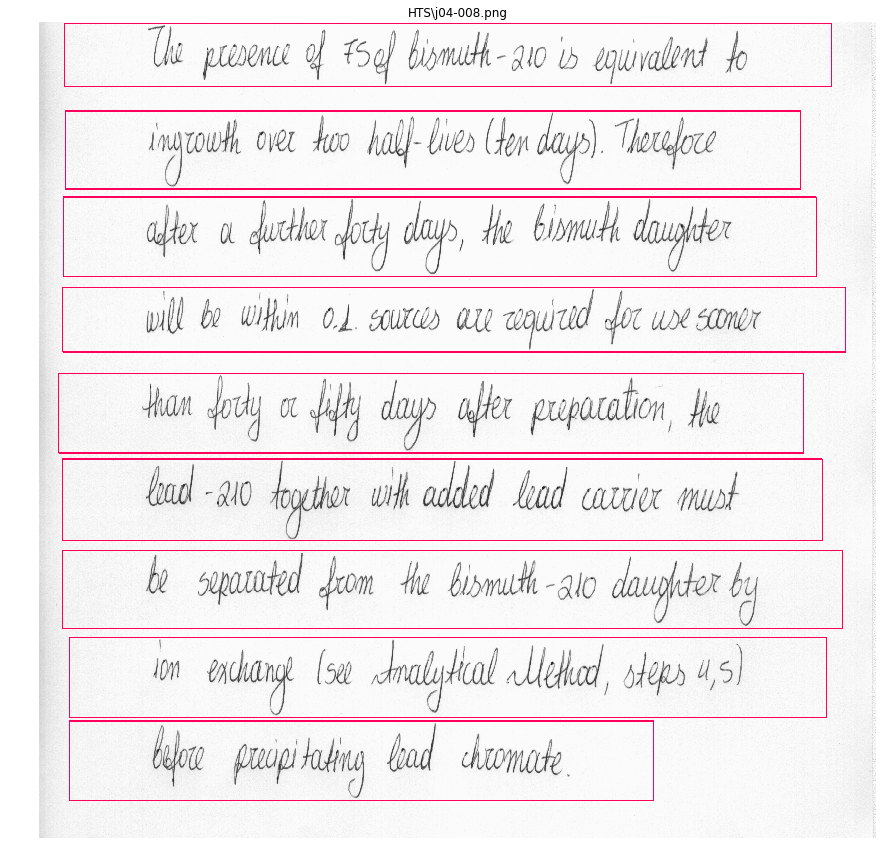

In [29]:
for imagePath in list_images('HTS'):
    findLines(imagePath)